In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
df = pd.read_csv(r'E:\BenignAndMaliciousDataset.csv')


In [3]:
df.nunique(axis=0)

Domain                 90000
DNSRecordType              3
MXDnsResponse              2
TXTDnsResponse             2
HasSPFInfo                 2
HasDkimInfo                2
HasDmarcInfo               2
Ip                     16985
DomainInAlexaDB            2
CommonPorts                2
CountryCode              108
RegisteredCountry        113
CreationDate               5
LastUpdateDate             5
ASN                     1976
HttpResponseCode           4
RegisteredOrg           4377
SubdomainNumber          207
Entropy                    6
EntropyOfSubDomains        4
StrangeCharacters         47
TLD                      756
IpReputation               2
DomainReputation           2
ConsoantRatio             11
NumericRatio               9
SpecialCharRatio          10
VowelRatio                 9
ConsoantSequence          25
VowelSequence              8
NumericSequence           26
SpecialCharSequence        9
DomainLength             150
Class                      2
dtype: int64

In [4]:
# Check for null values in each column
null_values_in_columns = df.isnull().sum()
null_values_in_columns

Domain                     0
DNSRecordType              0
MXDnsResponse              0
TXTDnsResponse             0
HasSPFInfo                 0
HasDkimInfo                0
HasDmarcInfo               0
Ip                         0
DomainInAlexaDB            0
CommonPorts                0
CountryCode            29052
RegisteredCountry      77774
CreationDate               0
LastUpdateDate             0
ASN                        0
HttpResponseCode           0
RegisteredOrg          35391
SubdomainNumber            0
Entropy                    0
EntropyOfSubDomains        0
StrangeCharacters          0
TLD                      170
IpReputation               0
DomainReputation           0
ConsoantRatio              0
NumericRatio               0
SpecialCharRatio           0
VowelRatio                 0
ConsoantSequence           0
VowelSequence              0
NumericSequence            0
SpecialCharSequence        0
DomainLength               0
Class                      0
dtype: int64

In [5]:
df=df.drop(columns=['Domain','Ip','CountryCode','RegisteredCountry','RegisteredOrg','TLD','ASN','DNSRecordType'])

In [6]:
# Check for null values in each column
null_values_in_columns = df.isnull().sum()
null_values_in_columns

MXDnsResponse          0
TXTDnsResponse         0
HasSPFInfo             0
HasDkimInfo            0
HasDmarcInfo           0
DomainInAlexaDB        0
CommonPorts            0
CreationDate           0
LastUpdateDate         0
HttpResponseCode       0
SubdomainNumber        0
Entropy                0
EntropyOfSubDomains    0
StrangeCharacters      0
IpReputation           0
DomainReputation       0
ConsoantRatio          0
NumericRatio           0
SpecialCharRatio       0
VowelRatio             0
ConsoantSequence       0
VowelSequence          0
NumericSequence        0
SpecialCharSequence    0
DomainLength           0
Class                  0
dtype: int64

In [7]:
# Check for null values in each column
null_values_in_columns = df.isnull().sum()
null_values_in_columns

MXDnsResponse          0
TXTDnsResponse         0
HasSPFInfo             0
HasDkimInfo            0
HasDmarcInfo           0
DomainInAlexaDB        0
CommonPorts            0
CreationDate           0
LastUpdateDate         0
HttpResponseCode       0
SubdomainNumber        0
Entropy                0
EntropyOfSubDomains    0
StrangeCharacters      0
IpReputation           0
DomainReputation       0
ConsoantRatio          0
NumericRatio           0
SpecialCharRatio       0
VowelRatio             0
ConsoantSequence       0
VowelSequence          0
NumericSequence        0
SpecialCharSequence    0
DomainLength           0
Class                  0
dtype: int64

In [8]:
df.shape

(90000, 26)

In [9]:
df.head()

,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,DomainInAlexaDB,CommonPorts,CreationDate,LastUpdateDate,HttpResponseCode,...,ConsoantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsoantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,False,False,False,False,False,False,False,0,0,0,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,False,False,False,False,False,False,False,0,0,0,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,False,False,False,False,False,False,False,0,0,0,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,False,False,False,False,False,False,False,0,0,0,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,False,False,False,False,False,False,False,0,0,0,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1


In [10]:
df.dtypes

MXDnsResponse             bool
TXTDnsResponse            bool
HasSPFInfo                bool
HasDkimInfo               bool
HasDmarcInfo              bool
DomainInAlexaDB           bool
CommonPorts               bool
CreationDate             int64
LastUpdateDate           int64
HttpResponseCode         int64
SubdomainNumber          int64
Entropy                  int64
EntropyOfSubDomains      int64
StrangeCharacters        int64
IpReputation              bool
DomainReputation          bool
ConsoantRatio          float64
NumericRatio           float64
SpecialCharRatio       float64
VowelRatio             float64
ConsoantSequence         int64
VowelSequence            int64
NumericSequence          int64
SpecialCharSequence      int64
DomainLength             int64
Class                    int64
dtype: object

In [11]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Exclude non-numeric and irrelevant features
y = df['Class']

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
# Train a Random Forest classifier to determine feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

In [16]:
feature_importances

MXDnsResponse          0.006318
TXTDnsResponse         0.012067
HasSPFInfo             0.021543
HasDkimInfo            0.000094
HasDmarcInfo           0.000868
DomainInAlexaDB        0.002063
CommonPorts            0.004108
CreationDate           0.016740
LastUpdateDate         0.019234
HttpResponseCode       0.013817
SubdomainNumber        0.060738
Entropy                0.008637
EntropyOfSubDomains    0.000134
StrangeCharacters      0.095894
IpReputation           0.001818
DomainReputation       0.000200
ConsoantRatio          0.122330
NumericRatio           0.201003
SpecialCharRatio       0.002166
VowelRatio             0.082634
ConsoantSequence       0.014314
VowelSequence          0.004794
NumericSequence        0.212772
SpecialCharSequence    0.001820
DomainLength           0.093895
dtype: float64

In [17]:
# Select top k features based on importance scores
k = 10  # You can adjust this parameter
selected_features = feature_importances.nlargest(k).index

In [18]:
selected_features

Index(['NumericSequence', 'NumericRatio', 'ConsoantRatio', 'StrangeCharacters',
       'DomainLength', 'VowelRatio', 'SubdomainNumber', 'HasSPFInfo',
       'LastUpdateDate', 'CreationDate'],
      dtype='object')

In [19]:
X_train[selected_features]

,NumericSequence,NumericRatio,ConsoantRatio,StrangeCharacters,DomainLength,VowelRatio,SubdomainNumber,HasSPFInfo,LastUpdateDate,CreationDate
51004,3,0.1,0.6,19,153,0.2,0,False,0,0
11453,2,0.2,0.3,0,9,0.3,0,True,4,0
9691,0,0.0,0.7,0,12,0.2,0,False,0,0
51992,4,0.4,0.4,2,10,0.1,0,False,4,4
23531,0,0.0,0.6,0,16,0.4,0,False,0,0
...,...,...,...,...,...,...,...,...,...,...
6265,3,0.3,0.3,6,30,0.2,57,True,4,4
54886,0,0.0,0.5,2,17,0.3,0,False,0,0
76820,0,0.0,0.6,0,18,0.3,0,False,0,0
860,0,0.0,0.6,0,13,0.2,0,False,4,4


In [20]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}


In [21]:
from tabulate import tabulate

# Initialize an empty list to store results
results = []

# Evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier with the final selected features
    clf.fit(X_train[selected_features], y_train)

    # Evaluate the model on the test set
    y_pred = clf.predict(X_test[selected_features])

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to the list
    results.append([clf_name, accuracy, precision, recall, f1])

# Print results in tabular format
print(tabulate(results, headers=["Classifier", "Accuracy", "Precision", "Recall", "F1-score"]))


Classifier                Accuracy    Precision    Recall    F1-score
----------------------  ----------  -----------  --------  ----------
Random Forest             0.979722     0.976865  0.983381    0.980112
Support Vector Machine    0.848        0.987527  0.709818    0.825954
Gradient Boosting         0.974333     0.975367  0.974087    0.974726
K-Nearest Neighbors       0.975833     0.975128  0.977367    0.976246
Decision Tree             0.976667     0.978504  0.975508    0.977004
Naive Bayes               0.901889     0.938346  0.863656    0.899453
AdaBoost                  0.966056     0.967364  0.965777    0.96657


## Hyper Parameter

In [22]:
df

,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,DomainInAlexaDB,CommonPorts,CreationDate,LastUpdateDate,HttpResponseCode,...,ConsoantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsoantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,False,False,False,False,False,False,False,0,0,0,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,False,False,False,False,False,False,False,0,0,0,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,False,False,False,False,False,False,False,0,0,0,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,False,False,False,False,False,False,False,0,0,0,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,False,False,False,False,False,False,False,0,0,0,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,False,False,False,False,False,False,False,0,0,0,...,0.5,0.2,0.0,0.2,4,1,2,0,27,0
89996,False,False,False,False,False,False,False,0,0,0,...,0.6,0.0,0.0,0.4,3,2,0,0,26,0
89997,False,False,False,False,False,False,False,0,0,0,...,0.5,0.1,0.0,0.4,3,2,2,0,31,0
89998,True,True,True,False,False,False,False,4,4,4,...,0.5,0.0,0.0,0.4,4,2,0,0,11,0


In [23]:
# Define classifiers with hyperparameter grids
classifiers = {
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5]}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5]})
}


In [24]:
from sklearn.model_selection import GridSearchCV

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Iterate over classifiers
for clf_name, (clf, param_grid) in classifiers.items():
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train[selected_features], y_train)
    
    # Get the best parameters and store them in the dictionary
    best_params_dict[clf_name] = grid_search.best_params_

# Display the best parameters
best_params_dict


{'Random Forest': {'max_depth': 10, 'n_estimators': 50},
 'Gradient Boosting': {'learning_rate': 0.5, 'n_estimators': 150},
 'K-Nearest Neighbors': {'n_neighbors': 5, 'weights': 'uniform'},
 'Decision Tree': {'max_depth': 10, 'min_samples_split': 5},
 'AdaBoost': {'learning_rate': 0.5, 'n_estimators': 150}}

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import time
import joblib

# Create an empty list to store results
results = []

# Iterate over classifiers
for clf_name, (clf, param_grid) in classifiers.items():
    start_time = time.time()  # Start time
    
    # Get the best parameters for the current classifier
    best_params = best_params_dict[clf_name]
    
    # Create the best model with the best parameters
    best_clf = clf.set_params(**best_params)
    
    # Train the best model on the full training set
    best_clf.fit(X_train[selected_features], y_train)
    
    # Evaluate the model on the test set
    y_pred = best_clf.predict(X_test[selected_features])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()  # End time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    
    # Append results to the list
    results.append([clf_name, accuracy, precision, recall, f1, elapsed_time])
    

# Print results in tabular format
headers = ['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Time (sec)']
print(tabulate(results, headers=headers, tablefmt='grid'))


+---------------------+------------+-------------+----------+------------+--------------+
| Algorithm           |   Accuracy |   Precision |   Recall |   F1 Score |   Time (sec) |
+=====================+============+=============+==========+============+==============+
| Random Forest       |   0.978944 |    0.978705 | 0.979882 |   0.979293 |    1.51895   |
+---------------------+------------+-------------+----------+------------+--------------+
| Gradient Boosting   |   0.980556 |    0.97794  | 0.983927 |   0.980924 |    5.13218   |
+---------------------+------------+-------------+----------+------------+--------------+
| K-Nearest Neighbors |   0.975833 |    0.975128 | 0.977367 |   0.976246 |    2.22416   |
+---------------------+------------+-------------+----------+------------+--------------+
| Decision Tree       |   0.979389 |    0.977265 | 0.982287 |   0.97977  |    0.0807838 |
+---------------------+------------+-------------+----------+------------+--------------+
| AdaBoost

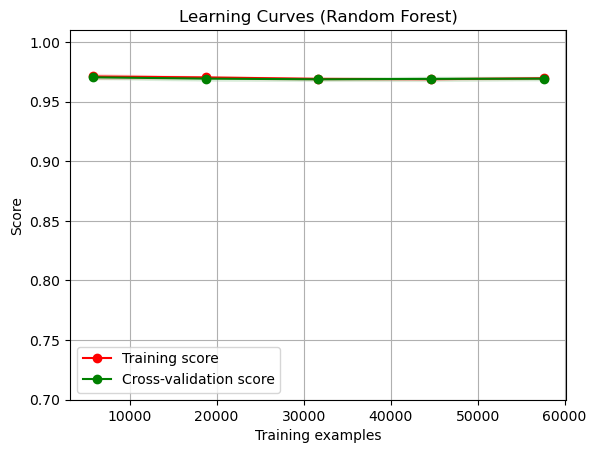

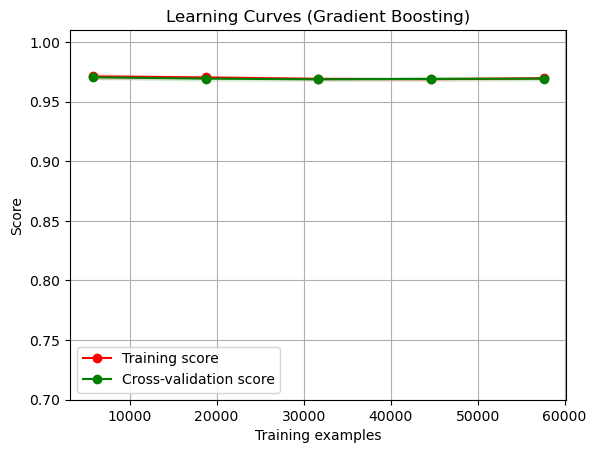

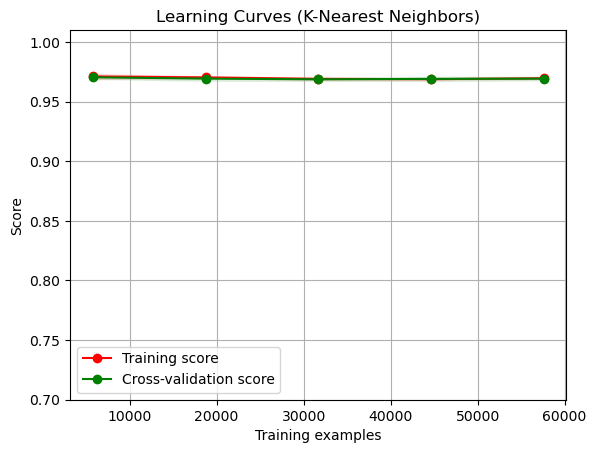

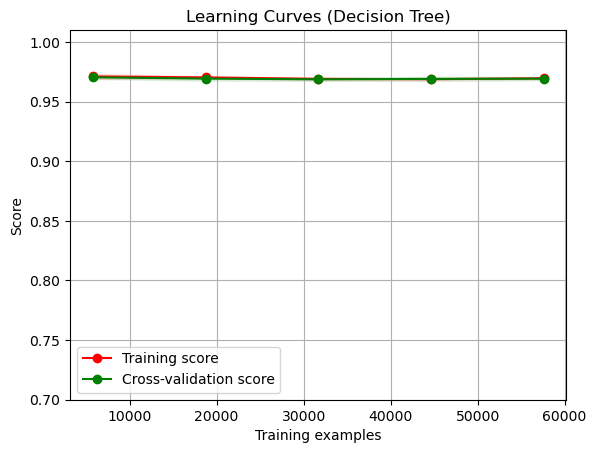

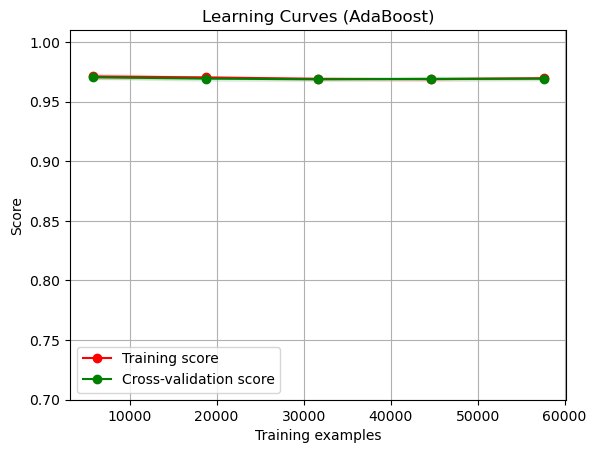

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Function to plot learning curves with custom y-axis limit
def plot_learning_curve(estimator, title, X, y, ylim=(0.95, 1.0), cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.ylim(*ylim)  # Set y-axis limit
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Loop over classifiers and plot learning curves
for clf_name, (clf, param_grid) in classifiers.items():
    title = f"Learning Curves ({clf_name})"
    plot_learning_curve(best_clf, title, X_train[selected_features], y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()